In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
from collections import Counter
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
import numpy as np
import seaborn as sns
import nltk as nl
import spacy
import re
from textblob import Word
nl.download('punkt')
nl.download('averaged_perceptron_tagger')
#nlp = spacy.load("en_core_web_sm")
nl.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
text_df = pd.read_csv('IEMOCAP_TEXT/text_features_extraction.csv')

In [ ]:
text_df.head()

,Unnamed: 0,filename,text,emotion,processed_text,AWL,ASL,NOW,NVB,NAJ,NPV,NST,CDV,NTP,TPR
0,0,Ses01F_impro01_F000,Excuse me.,neu,excuse me .,3.000000,3.0,3,0,0,0,1,3.0,0,0.0
1,1,Ses01F_impro01_M000,Do you have your forms?,fru,do you have your forms ?,3.166667,6.0,6,2,0,0,1,6.0,0,0.0
2,2,Ses01F_impro01_F001,Yeah.,neu,yeah .,2.500000,2.0,2,0,0,0,1,0.0,0,0.0
3,3,Ses01F_impro01_M001,Let me see them.,fru,let me see them .,2.600000,5.0,5,2,0,0,1,0.0,0,0.0
4,4,Ses01F_impro01_F002,Is there a problem?,neu,is there a problem ?,3.200000,5.0,5,1,0,0,1,5.0,0,0.0


In [ ]:
text_df = text_df.drop(["filename","text"],axis=1)
text_df = text_df.drop("Unnamed: 0",axis=1)

In [ ]:
text_df = text_df.drop("processed_text",axis=1)
text_df.head()

,emotion,AWL,ASL,NOW,NVB,NAJ,NPV,NST,CDV,NTP,TPR
0,neu,3.000000,3.0,3,0,0,0,1,3.0,0,0.0
1,fru,3.166667,6.0,6,2,0,0,1,6.0,0,0.0
2,neu,2.500000,2.0,2,0,0,0,1,0.0,0,0.0
3,fru,2.600000,5.0,5,2,0,0,1,0.0,0,0.0
4,neu,3.200000,5.0,5,1,0,0,1,5.0,0,0.0


In [ ]:
text_df = text_df[text_df.emotion != "xxx"]
text_df = text_df[text_df.emotion != "fru"]
text_df = text_df[text_df.emotion != "sur"]
text_df = text_df[text_df.emotion != "exc"]
text_df = text_df[text_df.emotion != "oth"]
text_df = text_df[text_df.emotion != "fea"]
text_df = text_df[text_df.emotion != "dis"]
text_df.head()

,emotion,AWL,ASL,NOW,NVB,NAJ,NPV,NST,CDV,NTP,TPR
0,neu,3.000000,3.0,3,0,0,0,1,3.0,0,0.0
2,neu,2.500000,2.0,2,0,0,0,1,0.0,0,0.0
4,neu,3.200000,5.0,5,1,0,0,1,5.0,0,0.0
9,neu,3.090909,5.5,11,3,0,0,2,5.5,0,0.0
23,ang,3.000000,6.0,6,1,0,0,1,6.0,0,0.0


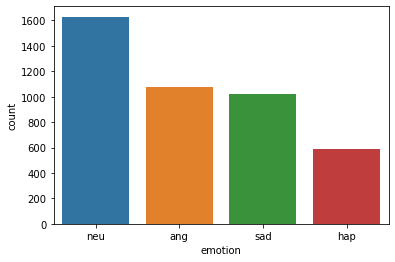

In [ ]:
import seaborn as sns
sns.countplot(x="emotion", data=text_df)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = text_df.drop(['emotion'],axis=1).values
y = text_df['emotion'].values

In [ ]:
X.shape

(4316, 10)

In [ ]:
y.shape

(4316,)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [ ]:
"""rf = RandomForestClassifier(max_depth=2, random_state=42)
rf.fit(X, y)
rf.feature_importances_  
model = SelectFromModel(rf, prefit=True)
X = model.transform(X)
X.shape"""

(4316, 6)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6, stratify=y)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(2589, 10)
(2589,)
(1727, 10)
(1727,)


(None, None)

In [ ]:
Counter(y_train)

Counter({'neu': 977, 'sad': 613, 'hap': 352, 'ang': 647})

In [ ]:
#from imblearn.under_sampling import RandomUnderSampler
# define undersampling strategy
#undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
#X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# summarize class distribution
#print("After undersampling: ", Counter(y_train_under))

After undersampling:  Counter({'fru': 1083, 'neu': 977, 'ang': 647, 'exc': 617, 'sad': 613, 'hap': 352, 'sur': 64, 'fea': 24, 'oth': 2, 'dis': 1, 'xxx': 1})


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Create the models to be tested
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

rf = RandomForestClassifier(max_depth=2, random_state=42)
rf.fit(X_train, y_train)

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gbc.fit(X_train, y_train)

# Put the models in a list to be used for Cross-Validation
models = [logreg, rf, gbc]

from sklearn.model_selection import cross_val_score

def evaluate_model(model):

        
        accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

        print(np.mean(accuracy))

In [ ]:
#Undersampling set
"""
logreg_under = LogisticRegression(max_iter=5000)
logreg_under.fit(X_train_under, y_train_under)

rf_under = RandomForestClassifier(max_depth=2, random_state=42)
rf_under.fit(X_train_under, y_train_under)

gbc_under = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gbc_under.fit(X_train_under, y_train_under)

 Put the models in a list to be used for Cross-Validation
models_under = [logreg_under, rf_under, gbc_under]

evaluate_model(logreg_under)
evaluate_model(rf_under)
evaluate_model(gbc_under)
"""

NameError: name 'X_train_under' is not defined

In [ ]:
evaluate_model(logreg)
evaluate_model(rf)
evaluate_model(gbc)

0.4109698811826471
0.3920442409804112
0.3978409744367191


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
model = LogisticRegression(max_iter = 5000)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.409806 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.409419 (0.020247) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.409419 (0.020482) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.408390 (0.019903) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.409419 (0.020247) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.409419 (0.020555) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.408519 (0.020020) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.409806 (0.020139) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.409676 (0.020021) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.409034 (0.020106) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.409289 (0.018308) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.409161 (0.018456) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.408004 (0.017530) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.406072 (0.017745) wit

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.458086 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.429376 (0.029125) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.451644 (0.033648) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.458086 (0.029580) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.434406 (0.033437) with: {'max_features': 'log2', 'n_estimators': 10}
0.452035 (0.032360) with: {'max_features': 'log2', 'n_estimators': 100}
0.457313 (0.032547) with: {'max_features': 'log2', 'n_estimators': 1000}


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100]
learning_rate = [0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.453710 using {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.5}
0.377365 (0.001592) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.377365 (0.001592) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.377365 (0.001592) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.401309 (0.016474) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.401952 (0.016681) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.406201 (0.017003) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.377365 (0.001592) with: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 10, 'subsample': 0.5}
0.377365 (0.001592) with: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 10, 'subsample': 0.7}
0.377365 (0.001592) with: {'learning_rate': 0.01, 'max_depth': 7,

In [ ]:
# Create the final Multiple Linear Regression
logreg_final = LogisticRegression(C=1.0, penalty = 'l2', solver= 'newton-cg')
# Create the final Random Forest
rf_final = RandomForestClassifier(n_estimators = 1000,   
                                 max_features = 'sqrt',
                                 random_state = 42)

# Create the fnal Extreme Gradient Booster
gbc_final = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=9, random_state=42, subsample =0.5)

# Train the models using 80% of the original data
logreg_final.fit(X_train, y_train)
rf_final.fit(X_train, y_train)
gbc_final.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=9, random_state=42,
                           subsample=0.5)

In [ ]:
evaluate_model(logreg_final)
evaluate_model(rf_final)
evaluate_model(gbc_final)

0.4109698811826471
0.4550025018110125
0.4523080140101417


In [ ]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix,classification_report

In [ ]:
# LogReg.score(X,y)
model_train = logreg_final.predict(X_train)
model_test = logreg_final.predict(X_test)
print(logreg_final.score(X_train,y_train))
print(logreg_final.score(X_test,y_test))

0.41444573194283507
0.3943254198031268


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


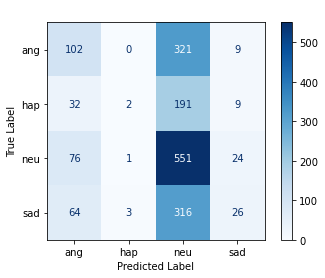

array([[102,   0, 321,   9],
       [ 32,   2, 191,   9],
       [ 76,   1, 551,  24],
       [ 64,   3, 316,  26]], dtype=int64)

In [ ]:
color = 'white'
matrix = plot_confusion_matrix(logreg_final, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.show()
confusion_matrix = metrics.confusion_matrix(y_test, model_test)
confusion_matrix

In [ ]:
report = classification_report(y_test, model_test,output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
df_classification_report

,precision,recall,f1-score,support
ang,0.372263,0.236111,0.288952,432.000000
hap,0.333333,0.008547,0.016667,234.000000
neu,0.399565,0.845092,0.542590,652.000000
sad,0.382353,0.063570,0.109015,409.000000
accuracy,0.394325,0.394325,0.394325,0.394325
macro avg,0.371878,0.288330,0.239306,1727.000000
weighted avg,0.379685,0.394325,0.305201,1727.000000


0.9138663576670529
0.45338737695425596


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


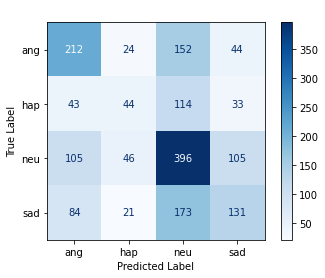

array([[212,  24, 152,  44],
       [ 43,  44, 114,  33],
       [105,  46, 396, 105],
       [ 84,  21, 173, 131]], dtype=int64)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
 
# performing predictions on the test dataset
y_pred = rf_final.predict(X_test)
print(rf_final.score(X_train,y_train))
print(rf_final.score(X_test,y_test))
color = 'white'
matrix = plot_confusion_matrix(rf_final, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.show()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

In [ ]:
report = classification_report(y_test, y_pred,output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
df_classification_report

,precision,recall,f1-score,support
ang,0.477477,0.490741,0.484018,432.000000
hap,0.325926,0.188034,0.238482,234.000000
neu,0.474251,0.607362,0.532616,652.000000
sad,0.418530,0.320293,0.362881,409.000000
accuracy,0.453387,0.453387,0.453387,0.453387
macro avg,0.424046,0.401608,0.404499,1727.000000
weighted avg,0.441765,0.453387,0.440408,1727.000000


0.7110853611432986
0.4493341053850608


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


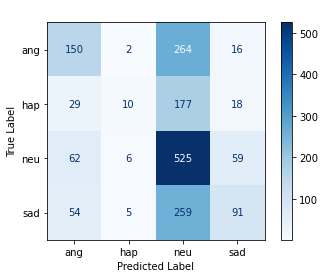

array([[150,   2, 264,  16],
       [ 29,  10, 177,  18],
       [ 62,   6, 525,  59],
       [ 54,   5, 259,  91]], dtype=int64)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
y_predict = gbc_final.predict(X_test)
print(gbc_final.score(X_train,y_train))
print(gbc_final.score(X_test,y_test))
color = 'white'
matrix = plot_confusion_matrix(gbc_final, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.show()
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
confusion_matrix

In [ ]:
report = classification_report(y_test, y_predict,output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
df_classification_report

,precision,recall,f1-score,support
ang,0.508475,0.347222,0.412655,432.000000
hap,0.434783,0.042735,0.077821,234.000000
neu,0.428571,0.805215,0.559403,652.000000
sad,0.494565,0.222494,0.306914,409.000000
accuracy,0.449334,0.449334,0.449334,0.449334
macro avg,0.466598,0.354416,0.339198,1727.000000
weighted avg,0.465029,0.449334,0.397647,1727.000000
